In [110]:
import pandas as pd
import sklearn
import seaborn as sns
PATH = "data\\lyrics.csv"

In [111]:
df_lyrics = pd.read_csv(PATH, encoding='utf-8')

In [112]:
df_lyrics.head()

,year,name,lyrics
0,1985,Stand Up For Singapore,"Stand up for Singapore, do the best you can\nR..."
1,1986,Count On Me Singapore,"We have a vision for tomorrow, just believe, j..."
2,1987,We Are Singapore,There was a time when people said\nThat Singap...
3,1989,Five Stars Arising,"There's a new moon arising, out of the stormy ..."
4,1991,It’s the Little Things,"Over the years, I've grown to be a part of you..."


## Data Cleaning

In [113]:
df_lyrics.dtypes

year       int64
name      object
lyrics    object
dtype: object

In [114]:
df_lyrics["lyrics"] = df_lyrics["lyrics"].apply(lambda s : s.replace("\n", " "))

In [115]:
df_lyrics.head()

,year,name,lyrics
0,1985,Stand Up For Singapore,"Stand up for Singapore, do the best you can Re..."
1,1986,Count On Me Singapore,"We have a vision for tomorrow, just believe, j..."
2,1987,We Are Singapore,There was a time when people said That Singapo...
3,1989,Five Stars Arising,"There's a new moon arising, out of the stormy ..."
4,1991,It’s the Little Things,"Over the years, I've grown to be a part of you..."


In [116]:
# Find total number of words for each song
import re
df_lyrics["num_words"] = df_lyrics["lyrics"].apply(lambda s : len(re.findall(r'\w+', s)))

In [129]:
# Find average char length for each word per song
def avg_word_length(s) :
    num_words = len(re.findall(r'\w+', s))
    list_of_words = s.split()
    total_num_char = sum(len(i) for i in list_of_words)
    return(total_num_char / num_words)

df_lyrics["avg_word_len"] = df_lyrics["lyrics"].apply(lambda s : avg_word_length(s))

In [130]:
df_lyrics["avg_word_len"]

0     4.158333
1     3.809249
2     4.468208
3     3.992593
4     3.682759
5     3.980645
6     3.809249
7     4.444444
8     3.822917
9     4.458015
10    4.458015
11    3.952381
12    3.711382
13    4.676829
14    3.822917
15    3.673077
16    3.396396
17    3.480392
18    4.165877
19    4.030172
20    3.842857
21    4.000000
22    3.810256
23    4.010989
24    3.652015
25    3.678445
26    3.897872
27    4.283333
28    4.257840
29    3.675063
30    3.662447
Name: avg_word_len, dtype: float64

In [117]:
# Combining year with name of song
df_lyrics["combined_name"] = df_lyrics["year"].astype(str).str.cat(df_lyrics["name"], sep = ", ")

In [118]:
df_lyrics["combined_name"]

0             1985, Stand Up For Singapore
1              1986, Count On Me Singapore
2                   1987, We Are Singapore
3                 1989, Five Stars Arising
4             1991, It’s the Little Things
5                  1995, My People My Home
6              1996, Count On Me Singapore
7                     1997, Singapore Town
8                               1998, Home
9                           1999, Together
10                       2000, Shine On Me
11                    2001, Where I Belong
12                 2002, We Will Get There
13                 2003, One United People
14                     2004, Home (Choral)
15           2005, Reach Out For The Skies
16                    2006, My Island Home
17    2007, There's No Place I'd Rather Be
18                          2007, Will You
19               2008, Shine For Singapore
20                   2009, What Do You See
21                2010, Song For Singapore
22                    2011, In A Heartbeat
23         

In [119]:
# Convert date to datetime object
df_lyrics["year"] = pd.to_datetime(df_lyrics["year"], format = "%Y")

## Preliminary EDA

In [137]:
# Sort by longest songs
df_lyrics.sort_values(by = ["num_words"], ascending = False)

,year,name,lyrics,num_words,combined_name,avg_word_len
29,2019-01-01,Our Singapore (remix),"Remember the days, We set out together with fa...",397,"2019, Our Singapore (remix)",3.675063
28,2018-01-01,We Are Singapore (remix),How many times have you heard them say “The fu...,287,"2018, We Are Singapore (remix)",4.257840
25,2015-01-01,Our Singapore,It isn't easy building something out of nothin...,283,"2015, Our Singapore",3.678445
20,2009-01-01,What Do You See,"There’s a jewel on the ocean, a gem upon the s...",280,"2009, What Do You See",3.842857
24,2013-01-01,One Singapore,"I will be here Right by your side, here I will...",273,"2013, One Singapore",3.652015
12,2002-01-01,We Will Get There,"Remember the days, we set out together with fa...",246,"2002, We Will Get There",3.711382
27,2017-01-01,Because It’s Singapore,Step by step Together we'll build our dreams H...,240,"2017, Because It’s Singapore",4.283333
21,2010-01-01,Song For Singapore,It's a brand new day a brand new story I remem...,238,"2010, Song For Singapore",4.000000
30,2020-01-01,Everything I Am,"I want you to understand Because of you, I am ...",237,"2020, Everything I Am",3.662447
26,2016-01-01,Tomorrow's Here Today,Raise your head to the skies This is how we al...,235,"2016, Tomorrow's Here Today",3.897872


In [126]:
import matplotlib as plt
plt.rcParams['figure.figsize'] = [30, 16]

<AxesSubplot:xlabel='year', ylabel='num_words'>

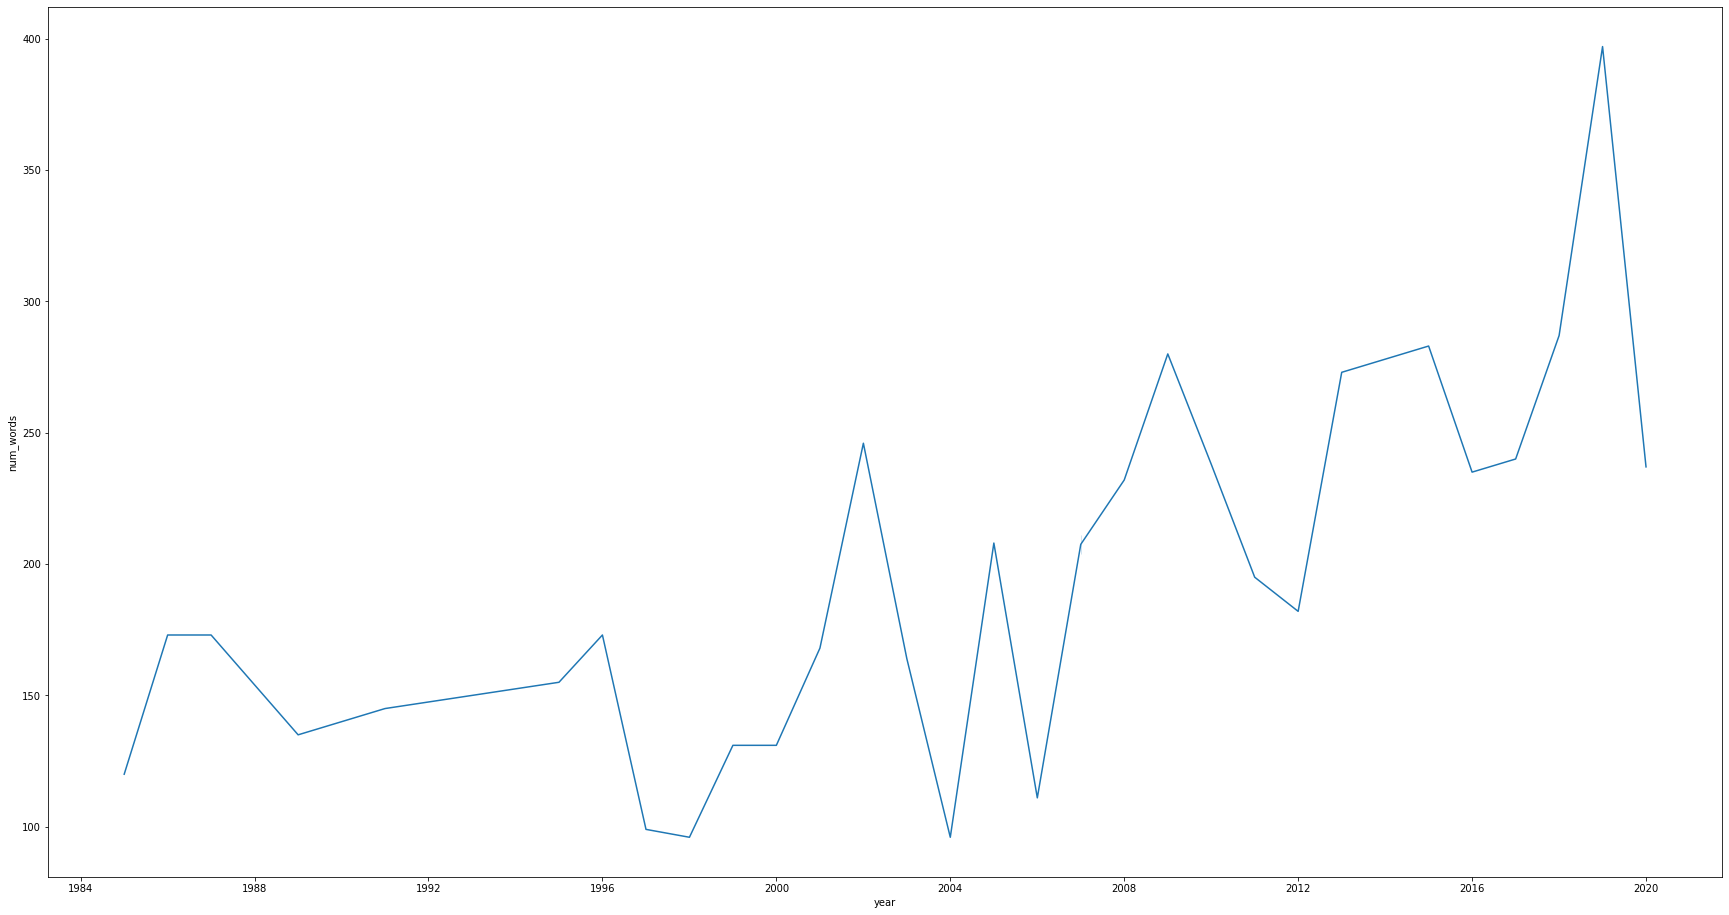

In [128]:
# Graph of total number of words vs year
sns.lineplot(x = "year", y = "num_words", data = df_lyrics)

<AxesSubplot:xlabel='year', ylabel='avg_word_len'>

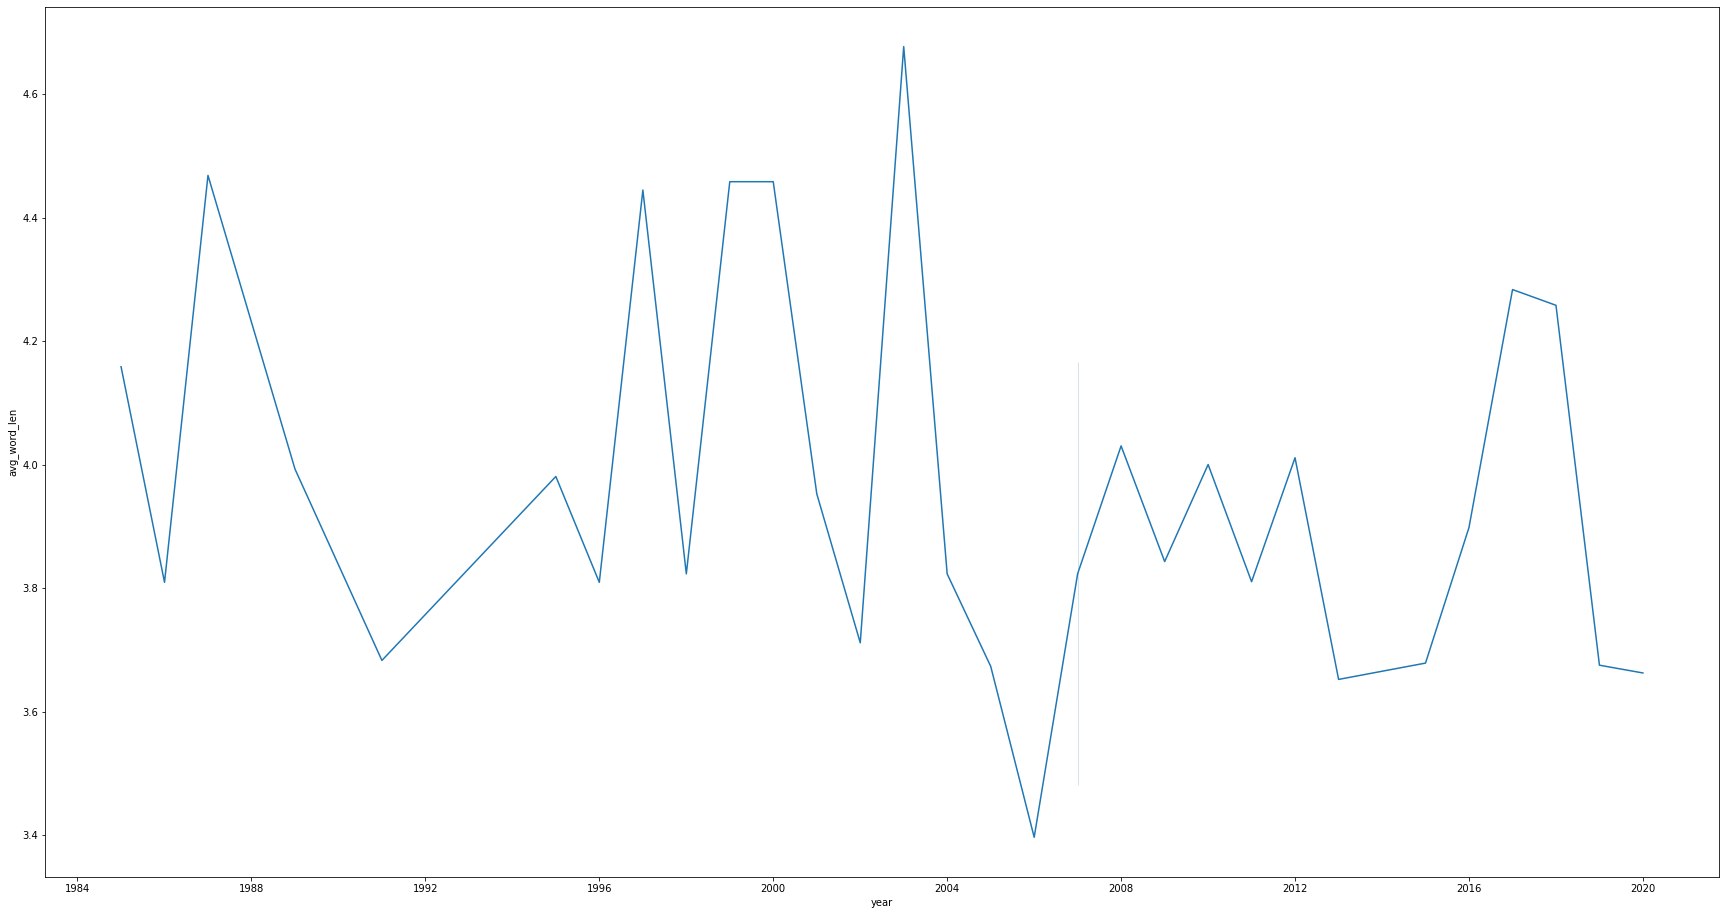

In [131]:
# Avg word length vs year
sns.lineplot(x = "year", y = "avg_word_len", data = df_lyrics)

## Vectorizing with CountVectorizer

In [79]:
corpus = df_lyrics["lyrics"].tolist()
corpus[:5]

['Stand up for Singapore, do the best you can Reach out for your fellow man You’ve got to make a stand Recognise you can play your part Let it come right from your heart Be prepared to give a little more Stand up, stand up for Singapore Stand up for Singapore, do it with a smile If you stand up for Singapore You’ll find it all worthwhile Believe in yourself, you’ve got something to share So show us all you really care Be prepared to give a little more Stand up, stand up for Singapore Singapore our home and nation Together with determination Join in like we’ve never done before Stand up, stand up for Singapore',
 'We have a vision for tomorrow, just believe, just believe We have a goal for Singapore, we can achieve, we can achieve You and me, we’ll do our part, stand together, heart to heart We’re going to show the world what Singapore can be We can achieve, we can achieve There is something down the road that we can strive for We are told no dream’s too bold that we can’t try for There

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words={'english'})
x = vectorizer.fit_transform(corpus)

In [83]:
x

<31x729 sparse matrix of type '<class 'numpy.int64'>'
	with 2430 stored elements in Compressed Sparse Row format>

In [87]:
import numpy as np

In [94]:
tf_array = np.asarray(x.sum(axis=0))
print(tf_array.shape)

(1, 729)


In [103]:
tf_array[0,427]

4

In [93]:
x[0, ]

<1x729 sparse matrix of type '<class 'numpy.int64'>'
	with 61 stored elements in Compressed Sparse Row format>

In [91]:
vectorizer.vocabulary_

{'stand': 540,
 'up': 649,
 'for': 220,
 'singapore': 513,
 'do': 160,
 'the': 592,
 'best': 57,
 'you': 722,
 'can': 91,
 'reach': 447,
 'out': 415,
 'your': 725,
 'fellow': 208,
 'man': 353,
 've': 656,
 'got': 245,
 'to': 614,
 'make': 351,
 'recognise': 455,
 'play': 427,
 'part': 419,
 'let': 327,
 'it': 303,
 'come': 120,
 'right': 465,
 'from': 229,
 'heart': 271,
 'be': 37,
 'prepared': 431,
 'give': 235,
 'little': 336,
 'more': 369,
 'with': 701,
 'smile': 523,
 'if': 294,
 'll': 341,
 'find': 210,
 'all': 14,
 'worthwhile': 713,
 'believe': 51,
 'in': 296,
 'yourself': 727,
 'something': 528,
 'share': 497,
 'so': 525,
 'show': 507,
 'us': 653,
 'really': 452,
 'care': 92,
 'our': 412,
 'home': 286,
 'and': 21,
 'nation': 378,
 'together': 616,
 'determination': 155,
 'join': 306,
 'like': 332,
 'we': 675,
 'never': 383,
 'done': 162,
 'before': 46,
 'have': 267,
 'vision': 657,
 'tomorrow': 618,
 'just': 309,
 'goal': 238,
 'achieve': 3,
 'me': 359,
 're': 446,
 'going': 24